In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [2]:
file_path = 'E-commerce_data.xlsx'
all_sheets = pd.read_excel(file_path, sheet_name=None)

EDA

In [3]:
print(all_sheets.keys())


dict_keys(['customers', 'genders', 'cities', 'transactions', 'branches', 'merchants'])


In [4]:
customers_df = all_sheets['customers']
genders_df = all_sheets['genders']
cities_df = all_sheets['cities']
transactions_df = all_sheets['transactions']
branches_df = all_sheets['branches']
merchants_df = all_sheets['merchants']



Handling Nulls

In [5]:
# Check for null values in all sheets at once
for sheet_name, df in all_sheets.items():
    print(f"Null values in sheet '{sheet_name}':")
    print(df.isnull().sum())
    print("\n")  


Null values in sheet 'customers':
customer_id    0
join_date      0
city_id        0
gender_id      0
dtype: int64


Null values in sheet 'genders':
gender_id      0
gender_name    0
dtype: int64


Null values in sheet 'cities':
city_id      0
city_name    0
dtype: int64


Null values in sheet 'transactions':
transaction_id           0
customer_id              0
transaction_date         0
transaction_status       0
coupon_name              0
burn_date             2484
branch_id                0
dtype: int64


Null values in sheet 'branches':
branch_id      0
merchant_id    0
dtype: int64


Null values in sheet 'merchants':
merchant_id      0
merchant_name    0
dtype: int64




In [6]:

customers_with_cities = pd.merge(customers_df, cities_df, on='city_id', how='left')

# Merge Customers with Genders on 'gender_id'
customers_with_genders = pd.merge(customers_df, genders_df, on='gender_id', how='left')

# Merge Transactions with Branches on 'branch_id'
transactions_with_branches = pd.merge(transactions_df, branches_df, on='branch_id', how='left')

# Merge Branches with Merchants on 'merchant_id'
branches_with_merchants = pd.merge(transactions_with_branches, merchants_df, on='merchant_id', how='left')

# Merge Transactions with Customers on 'customer_id'
final_merged_data = pd.merge(branches_with_merchants, customers_with_cities, on='customer_id', how='left')


In [7]:
# Check the final merged data
print(final_merged_data.head())
print(final_merged_data.info())


   transaction_id  customer_id transaction_date transaction_status  \
0               1          733       2024-05-11         subscribed   
1               2          631       2023-05-15             burned   
2               3          309       2022-11-13         subscribed   
3               4          695       2024-01-26         subscribed   
4               5          288       2022-10-12             burned   

  coupon_name  burn_date  branch_id  merchant_id  \
0     uNY-568        NaT          7            7   
1     kBx-219 2023-06-04          5            9   
2     PLG-122        NaT          7            7   
3     Wzf-897        NaT          2           18   
4     qGb-428 2022-11-20          6           15   

                    merchant_name  join_date  city_id  gender_id   city_name  
0                  Berry-Anderson 2023-05-16       15          2       Aswan  
1  Campbell, Shaffer and Martinez 2022-10-10       14          2    Damietta  
2                  Berry-Ande

Handling duplicates

In [8]:
# Check for duplicates
duplicates = final_merged_data.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# drop duplicates if found
final_merged_data = final_merged_data.drop_duplicates()


Number of duplicate rows: 0


In [9]:

print(final_merged_data.describe())


print(final_merged_data.describe(include=['object']))


       transaction_id  customer_id            transaction_date  \
count     5000.000000  5000.000000                        5000   
mean      2500.500000   509.551600  2023-10-22 04:38:47.040000   
min          1.000000     1.000000         2021-08-05 00:00:00   
25%       1250.750000   262.000000         2023-05-31 18:00:00   
50%       2500.500000   514.000000         2024-01-02 00:00:00   
75%       3750.250000   758.000000         2024-05-08 00:00:00   
max       5000.000000  1000.000000         2024-07-14 00:00:00   
std       1443.520003   287.065172                         NaN   

                           burn_date    branch_id  merchant_id  \
count                           2516  5000.000000  5000.000000   
mean   2023-12-01 20:39:06.581876224     5.529800    12.882600   
min              2021-08-14 00:00:00     1.000000     7.000000   
25%              2023-07-12 00:00:00     3.000000     9.000000   
50%              2024-02-11 00:00:00     6.000000    13.000000   
75%      

In [10]:
# Transaction status distribution
print(final_merged_data['transaction_status'].value_counts())


burn_rate = final_merged_data['transaction_status'].value_counts(normalize=True)
print(burn_rate)



transaction_status
burned        2516
subscribed    2484
Name: count, dtype: int64
transaction_status
burned        0.5032
subscribed    0.4968
Name: proportion, dtype: float64


In [11]:

print(final_merged_data.columns)


Index(['transaction_id', 'customer_id', 'transaction_date',
       'transaction_status', 'coupon_name', 'burn_date', 'branch_id',
       'merchant_id', 'merchant_name', 'join_date', 'city_id', 'gender_id',
       'city_name'],
      dtype='object')


In [12]:
# Gender distribution
print(final_merged_data['gender_id'].value_counts())

# City distribution
print(final_merged_data['city_name'].value_counts())


gender_id
1    2567
2    2433
Name: count, dtype: int64
city_name
Cairo                  337
Port Said              321
Aswan                  298
Giza                   291
Fayyum                 272
Qena                   263
Damanhur               263
El-Mahalla El-Kubra    263
Shubra El-Kheima       259
Suez                   247
Alexandria             242
Ismailia               237
Asyut                  231
Minya                  225
Sohag                  224
Zagazig                214
Mansoura               213
Damietta               211
Tanta                  210
Beni Suef              179
Name: count, dtype: int64


Visualization

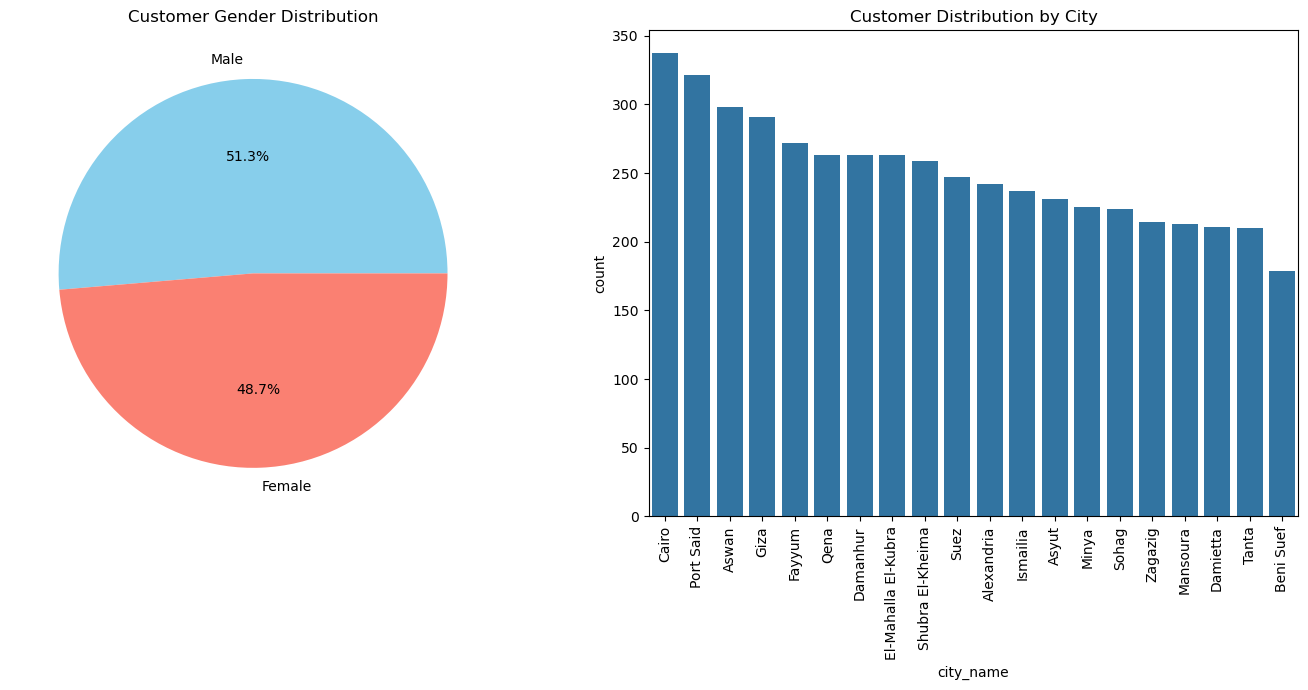

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


gender_mapping = {1: 'Male', 2: 'Female'}
final_merged_data['gender_name'] = final_merged_data['gender_id'].map(gender_mapping)


fig, axes = plt.subplots(1, 2, figsize=(14, 7))


gender_counts = final_merged_data['gender_name'].value_counts()
axes[0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
axes[0].set_title('Customer Gender Distribution')


sns.countplot(data=final_merged_data, x='city_name', order=final_merged_data['city_name'].value_counts().index, ax=axes[1])
axes[1].set_title('Customer Distribution by City')
axes[1].tick_params(axis='x', rotation=90)


plt.tight_layout()
plt.show()


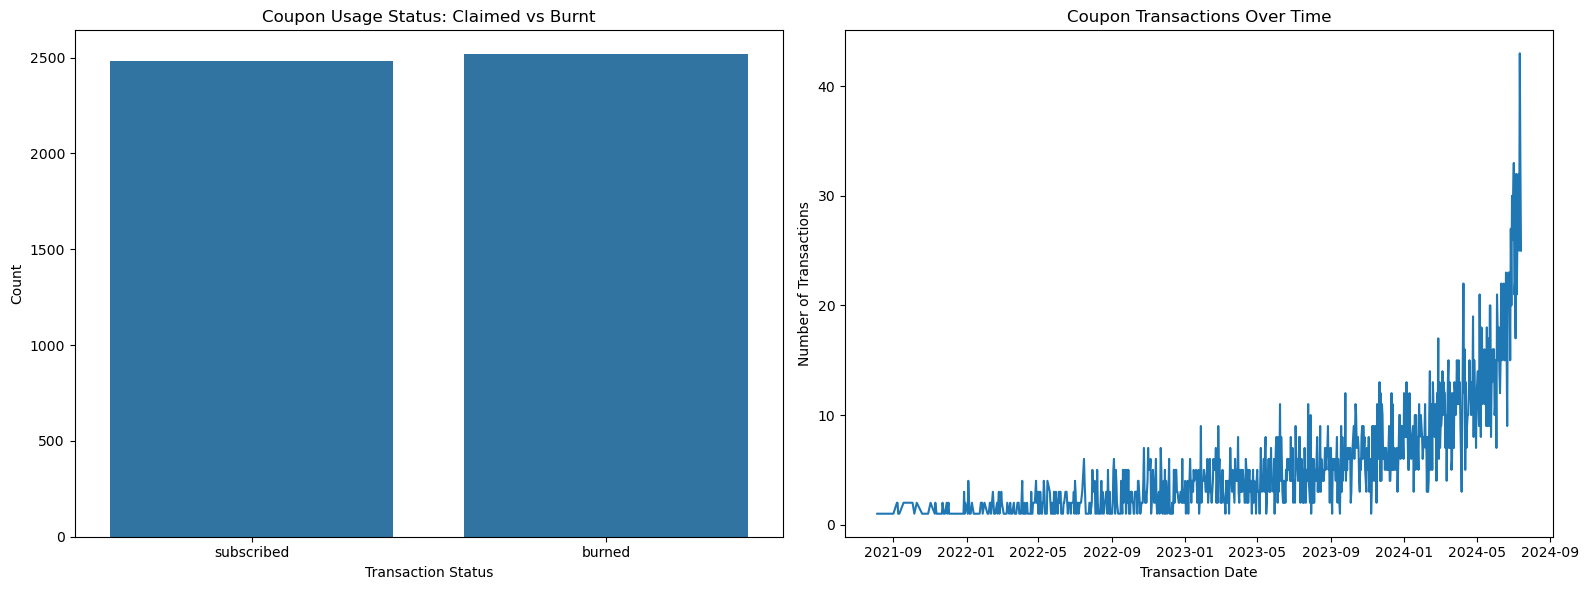

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'transaction_date' is in datetime format
final_merged_data['transaction_date'] = pd.to_datetime(final_merged_data['transaction_date'])

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot for coupon status distribution (claimed vs burnt)
sns.countplot(data=final_merged_data, x='transaction_status', ax=axes[0])
axes[0].set_title('Coupon Usage Status: Claimed vs Burnt')
axes[0].set_xlabel('Transaction Status')
axes[0].set_ylabel('Count')


transactions_over_time = final_merged_data.groupby('transaction_date')['transaction_id'].count()
axes[1].plot(transactions_over_time.index, transactions_over_time.values)
axes[1].set_title('Coupon Transactions Over Time')
axes[1].set_xlabel('Transaction Date')
axes[1].set_ylabel('Number of Transactions')


plt.tight_layout()
plt.show()


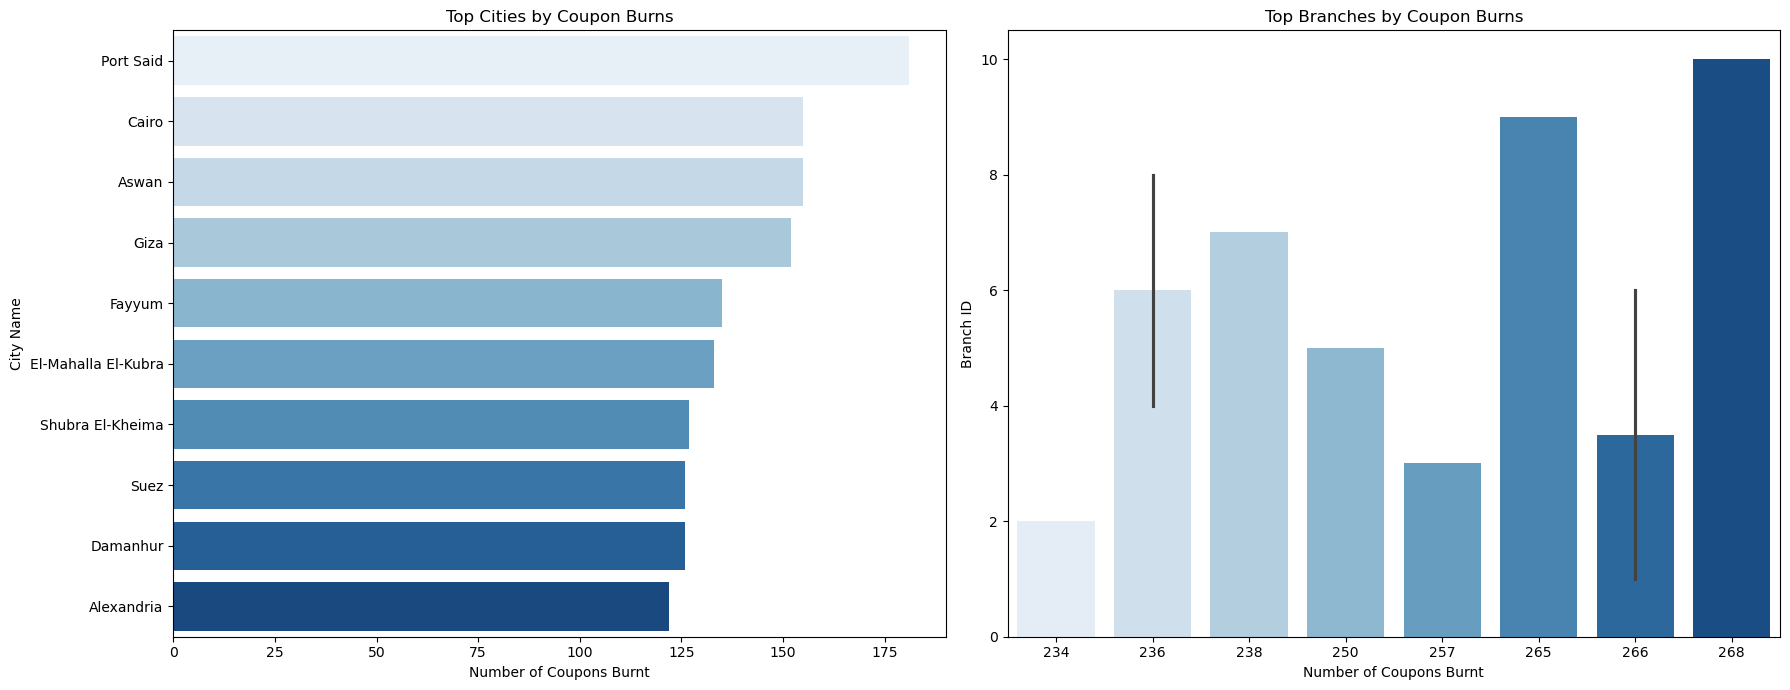

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for burnt coupons
burnt_coupons = final_merged_data[final_merged_data['transaction_status'] == 'burned']

# Get top cities and branches by coupon burns
top_cities = burnt_coupons['city_name'].value_counts().nlargest(10)
top_branches = burnt_coupons['branch_id'].value_counts().nlargest(10)


fig, axes = plt.subplots(1, 2, figsize=(18, 7))


sns.barplot(x=top_cities.values, y=top_cities.index, palette='Blues', ax=axes[0])
axes[0].set_title('Top Cities by Coupon Burns')
axes[0].set_xlabel('Number of Coupons Burnt')
axes[0].set_ylabel('City Name')


sns.barplot(x=top_branches.values, y=top_branches.index, palette='Blues', ax=axes[1])
axes[1].set_title('Top Branches by Coupon Burns')
axes[1].set_xlabel('Number of Coupons Burnt')
axes[1].set_ylabel('Branch ID')


plt.tight_layout()
plt.show()


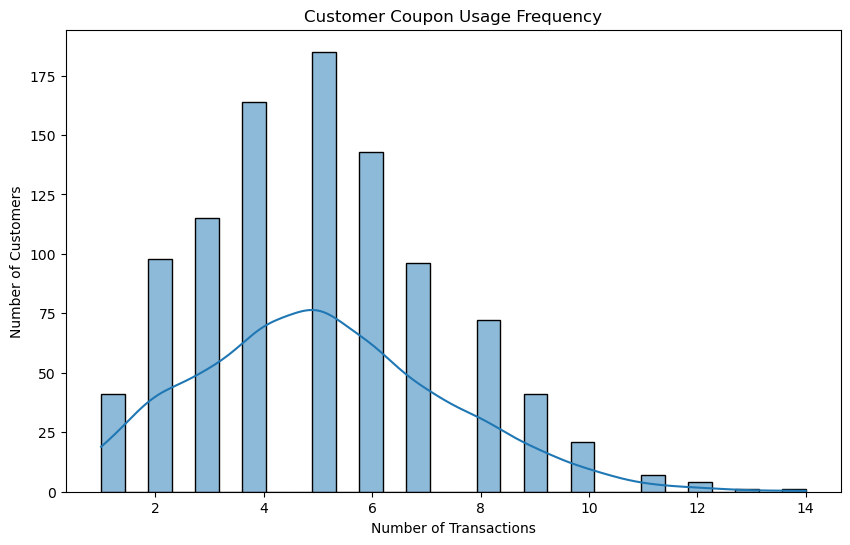

In [16]:
# Count the number of transactions per customer
coupon_usage_frequency = final_merged_data.groupby('customer_id')['transaction_id'].count()


plt.figure(figsize=(10, 6))
sns.histplot(coupon_usage_frequency, bins=30, kde=True)
plt.title('Customer Coupon Usage Frequency')
plt.xlabel('Number of Transactions')
plt.ylabel('Number of Customers')
plt.show()


In [17]:
import pandas as pd


transaction_dates = final_merged_data.groupby('customer_id').agg({
    'transaction_date': ['min', 'max']
})
print(transaction_dates.head())



            transaction_date           
                         min        max
customer_id                            
1                 2022-02-14 2024-05-26
2                 2023-05-21 2023-10-21
3                 2023-06-08 2024-07-05
4                 2023-01-15 2023-01-15
5                 2023-05-03 2024-07-02


Feature Engineering and Scaling

In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Ensure 'join_date' and 'transaction_date' are datetime
final_merged_data['join_date'] = pd.to_datetime(final_merged_data['join_date'])
final_merged_data['transaction_date'] = pd.to_datetime(final_merged_data['transaction_date'])
final_merged_data['burn_date'] = pd.to_datetime(final_merged_data['burn_date'])

final_merged_data['account_age'] = (pd.Timestamp.now() - final_merged_data['join_date']).dt.days

# 1. Transaction Counts
transaction_summary = final_merged_data.groupby('customer_id').agg({
    'transaction_id': 'count',                  # Total transactions
    'burn_date': 'count',                       # Total burnt coupons (count of burn_date)
    'transaction_status': lambda x: (x == 'claimed').sum()  # Total claimed coupons
}).rename(columns={'transaction_id': 'transaction_count', 'burn_date': 'burnt_count', 'transaction_status': 'claimed_count'})

# 2. First and Last Transaction Dates
transaction_dates = final_merged_data.groupby('customer_id').agg({
    'transaction_date': ['min', 'max']
})


transaction_dates.columns = ['first_transaction_date', 'last_transaction_date']

# Merge transaction_dates with transaction_summary
customer_features = transaction_summary.join(transaction_dates)

# Add account_age separately
customer_features = customer_features.join(
    final_merged_data.groupby('customer_id')['account_age'].max()
)

# Calculate average transaction interval in days
customer_features['average_transaction_interval'] = (
    (customer_features['last_transaction_date'] - customer_features['first_transaction_date']).dt.days / 
    (customer_features['transaction_count'] - 1)
).fillna(0)  # Fill NaN values 

# Reset index to include customer_id as a column
customer_features.reset_index(inplace=True)

# Feature Scaling
features = customer_features[['transaction_count', 'burnt_count', 'claimed_count', 'account_age', 'average_transaction_interval']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Add scaled features back to the DataFrame
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)
customer_features = pd.concat([customer_features, scaled_features_df.add_prefix('scaled_')], axis=1)


print(customer_features.head())


   customer_id  transaction_count  burnt_count  claimed_count  \
0            1                  7            3              0   
1            2                  3            1              0   
2            3                  5            1              0   
3            4                  1            0              0   
4            5                  4            3              0   

  first_transaction_date last_transaction_date  account_age  \
0             2022-02-14            2024-05-26          985   
1             2023-05-21            2023-10-21          506   
2             2023-06-08            2024-07-05          494   
3             2023-01-15            2023-01-15          664   
4             2023-05-03            2024-07-02          512   

   average_transaction_interval  scaled_transaction_count  scaled_burnt_count  \
0                    138.666667                  0.855575            0.293019   
1                     76.500000                 -0.904516           

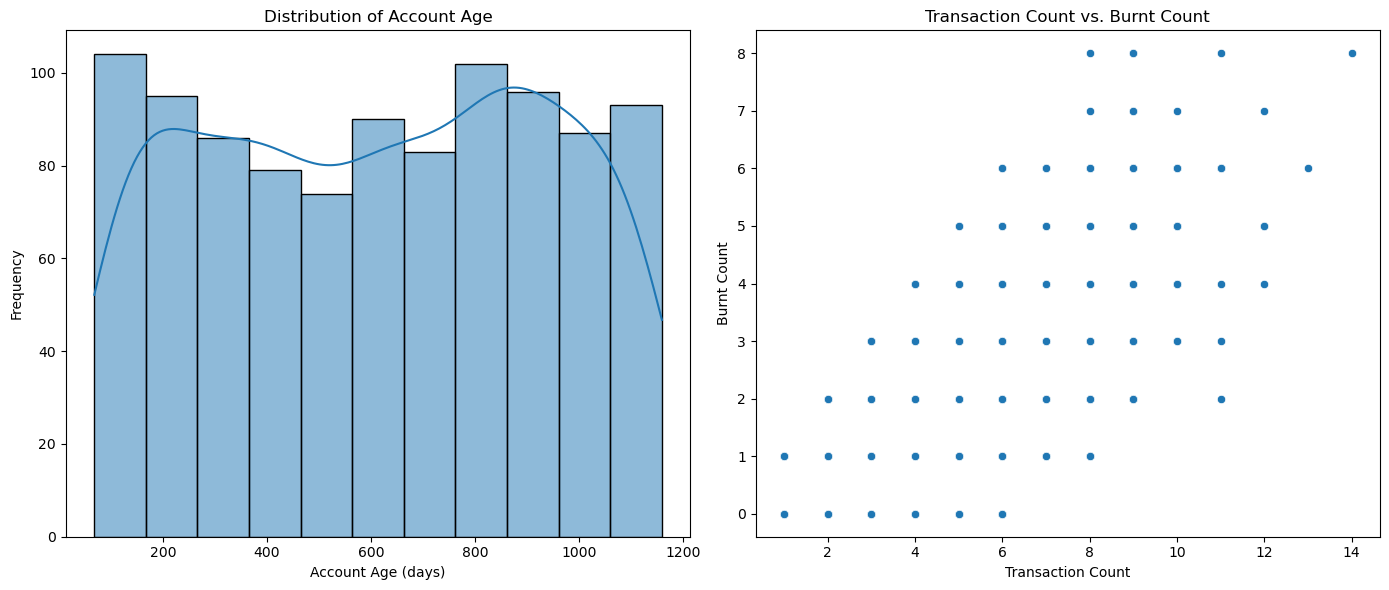

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
sns.histplot(customer_features['account_age'], kde=True)
plt.title('Distribution of Account Age')
plt.xlabel('Account Age (days)')
plt.ylabel('Frequency')


plt.subplot(1, 2, 2)
sns.scatterplot(x='transaction_count', y='burnt_count', data=customer_features)
plt.title('Transaction Count vs. Burnt Count')
plt.xlabel('Transaction Count')
plt.ylabel('Burnt Count')


plt.tight_layout()
plt.show()


K-Means

In [47]:
from sklearn.cluster import KMeans


X = customer_features[['transaction_count', 'burnt_count']]


kmeans = KMeans(n_clusters=3, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(X)


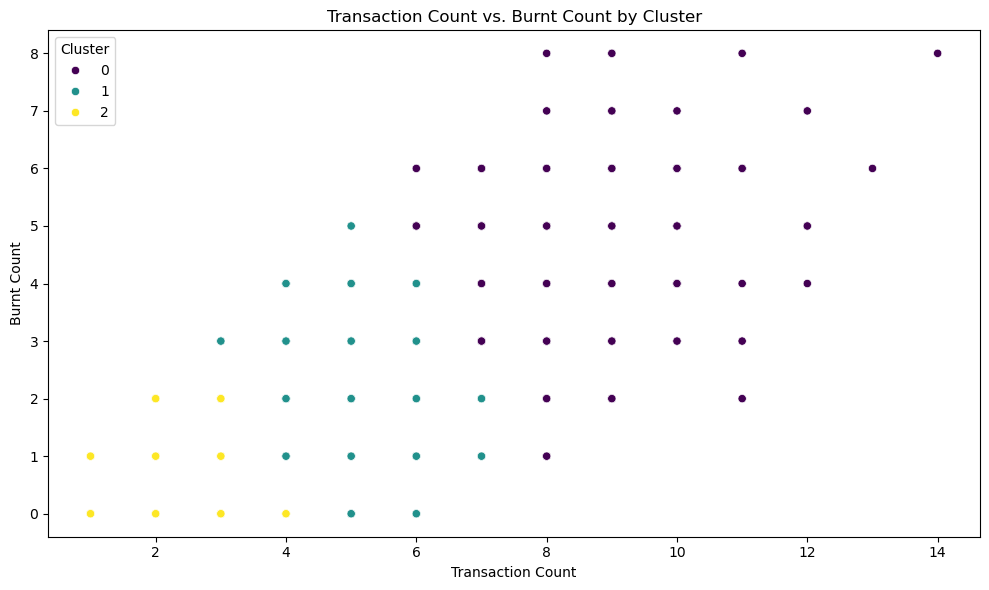

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.scatterplot(x='transaction_count', y='burnt_count', hue='Cluster', palette='viridis', data=customer_features, legend='full')
plt.title('Transaction Count vs. Burnt Count by Cluster')
plt.xlabel('Transaction Count')
plt.ylabel('Burnt Count')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


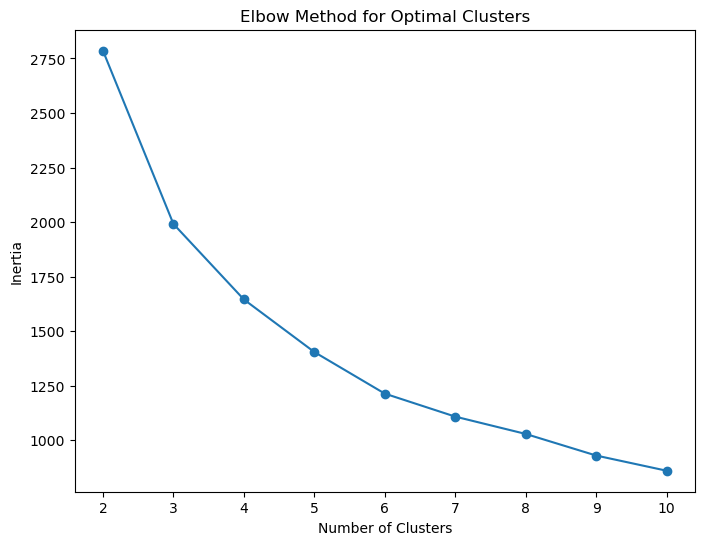

Silhouette Score: 0.31


In [49]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Extract features for clustering
features_for_clustering = customer_features[['scaled_transaction_count', 'scaled_burnt_count', 'scaled_claimed_count', 'scaled_account_age', 'scaled_average_transaction_interval']]

# Determine the optimal number of clusters using the elbow method
inertia = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(features_for_clustering)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


optimal_clusters = 4 


kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_features['cluster'] = kmeans.fit_predict(features_for_clustering)

# Evaluate the clustering
silhouette_avg = silhouette_score(features_for_clustering, customer_features['cluster'])
print(f'Silhouette Score: {silhouette_avg:.2f}')






a score of 0.31 indicates that the clusters are not  perfectly separated but they are better than completely overlapping but there is room for improvment

K-Means Silhouette Score: 0.29


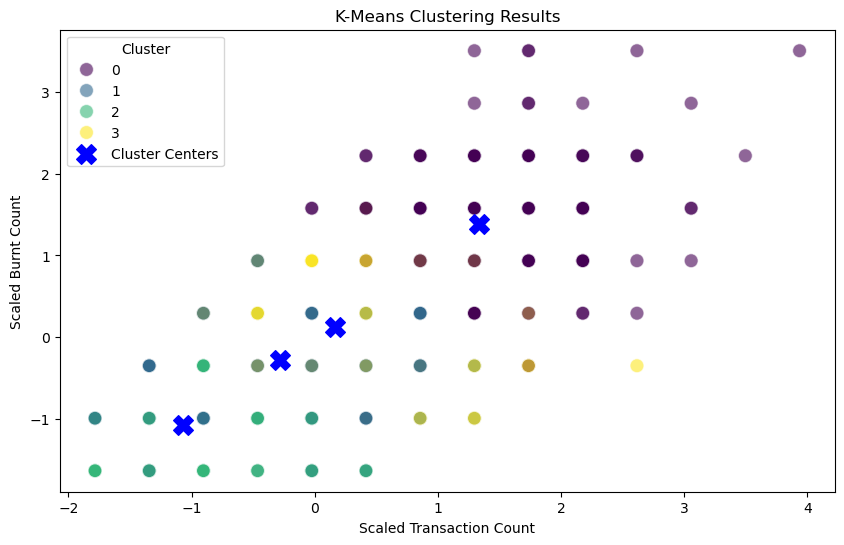

Inertia: 1134.665733128899


In [53]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

# Define the number of clusters
num_clusters = 4  # Adjust based on your analysis

# Train the K-Means model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
customer_features['cluster'] = kmeans.fit_predict(customer_features[['scaled_transaction_count', 'scaled_burnt_count', 'scaled_claimed_count', 'scaled_account_age']])

# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Evaluate the model
silhouette_avg = silhouette_score(customer_features[['scaled_transaction_count', 'scaled_burnt_count', 'scaled_claimed_count', 'scaled_account_age']], customer_features['cluster'])
print(f"K-Means Silhouette Score: {silhouette_avg:.2f}")


plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=customer_features,
    x='scaled_transaction_count',
    y='scaled_burnt_count',
    hue='cluster',
    palette='viridis',
    s=100,
    alpha=0.6
)

# Mark cluster centers
plt.scatter(
    cluster_centers[:, 0],
    cluster_centers[:, 1],
    c='blue',
    s=200,
    marker='X',
    label='Cluster Centers'
)

plt.title('K-Means Clustering Results')
plt.xlabel('Scaled Transaction Count')
plt.ylabel('Scaled Burnt Count')
plt.legend(title='Cluster')
plt.show()


inertia = kmeans.inertia_
print(f'Inertia: {inertia}')


In [58]:
cluster_profiles = customer_features.groupby('cluster').mean()
print(cluster_profiles)



         customer_id  transaction_count  burnt_count  claimed_count  \
cluster                                                               
0         512.841026           8.087179     4.702564            0.0   
1         509.895044           4.419825     2.116618            0.0   
2         461.518135           2.621762     0.865285            0.0   
3         508.503876           5.430233     2.736434            0.0   

               first_transaction_date         last_transaction_date  \
cluster                                                               
0       2023-03-07 08:14:46.153846272 2024-05-12 16:44:18.461538560   
1       2022-09-14 16:51:46.705539328 2024-01-17 12:56:40.583090432   
2       2023-11-11 23:22:41.658031104 2024-03-22 14:25:29.533678848   
3       2023-12-14 14:30:41.860465152 2024-06-07 03:04:11.162790656   

         account_age  average_transaction_interval  scaled_transaction_count  \
cluster                                                           

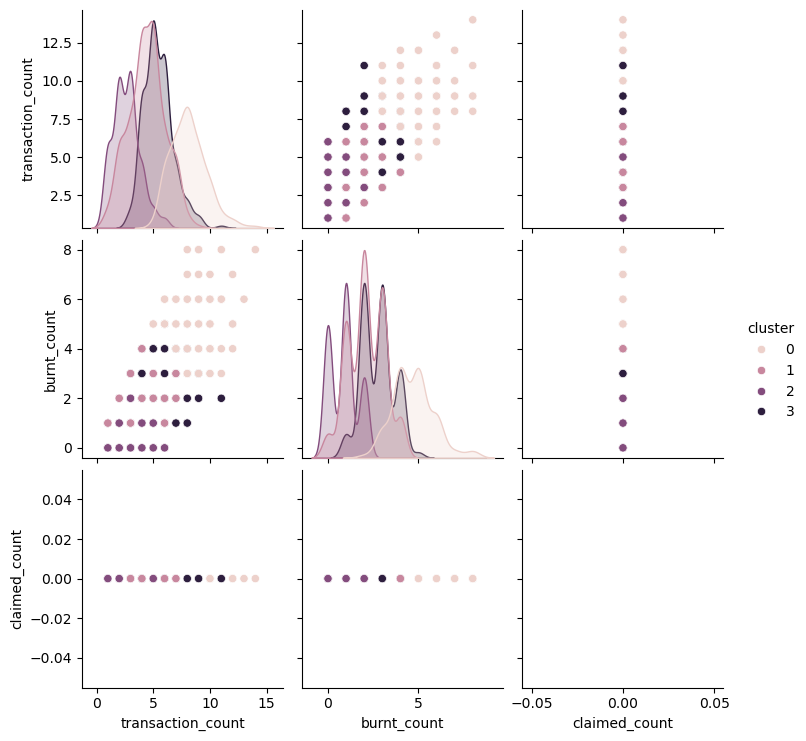

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.pairplot(customer_features, hue='cluster', vars=['transaction_count', 'burnt_count', 'claimed_count'])
plt.show()



1. **Cluster 0**: High transaction and burnt counts. These customers are frequent shoppers and might benefit from loyalty rewards and occasional discounts.
2. **Cluster 1**: Moderate transaction and claimed counts. These long-term customers could be incentivized with exclusive loyalty rewards and personalized offers.
3. **Cluster 2**: Low transaction and burnt counts. These relatively new customers might respond well to welcome discounts and introductory offers.
4. **Cluster 3**: Moderate transaction, burnt, and claimed counts. Providing loyalty rewards and personalized offers could help increase their satisfaction and loyalty.


DBscan

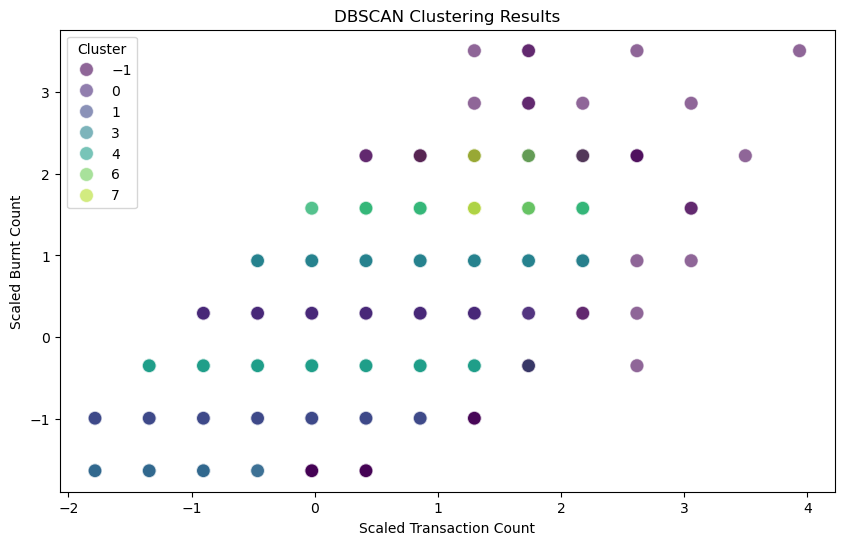

In [39]:
from sklearn.cluster import DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt

# Train the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples based on your data
customer_features['cluster'] = dbscan.fit_predict(customer_features[['scaled_transaction_count', 'scaled_burnt_count', 'scaled_claimed_count', 'scaled_account_age']])


plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=customer_features,
    x='scaled_transaction_count',
    y='scaled_burnt_count',
    hue='cluster',
    palette='viridis',
    s=100,
    alpha=0.6
)

plt.title('DBSCAN Clustering Results')
plt.xlabel('Scaled Transaction Count')
plt.ylabel('Scaled Burnt Count')
plt.legend(title='Cluster')
plt.show()


In [65]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features[['transaction_count', 'burnt_count', 'claimed_count']])

clusters = dbscan.fit_predict(scaled_features)  


if len(set(clusters)) > 1:
    silhouette_avg = silhouette_score(scaled_features, clusters)
    print(f'Silhouette Score for DBscan: {silhouette_avg}')
else:
    print('Silhouette score is not defined for a single cluster')


Silhouette Score for DBscan: 0.22726416701171687


Hierarchical

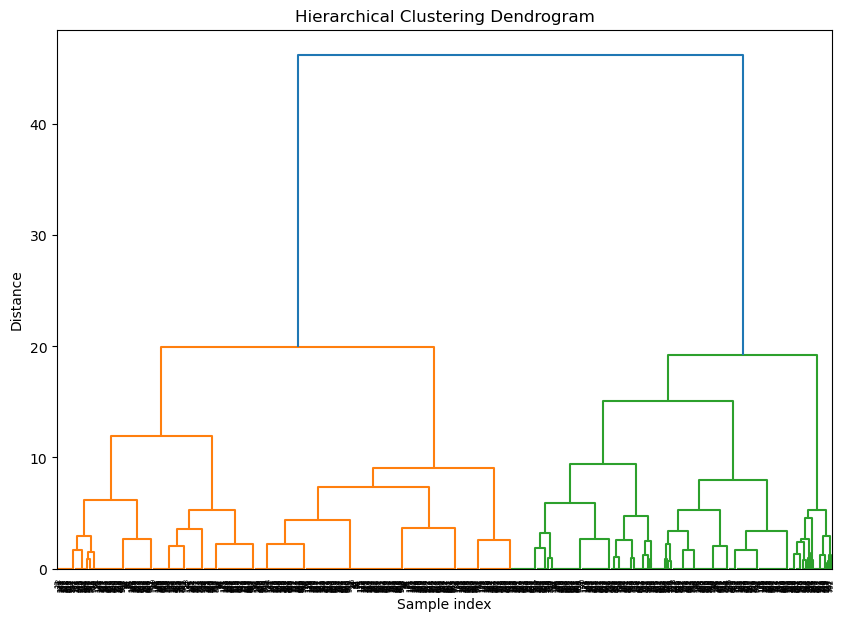

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler


X = customer_features[['transaction_count', 'burnt_count']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform hierarchical clustering
linked = linkage(X_scaled, method='ward')  # You can also try 'single', 'complete', etc.


plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()




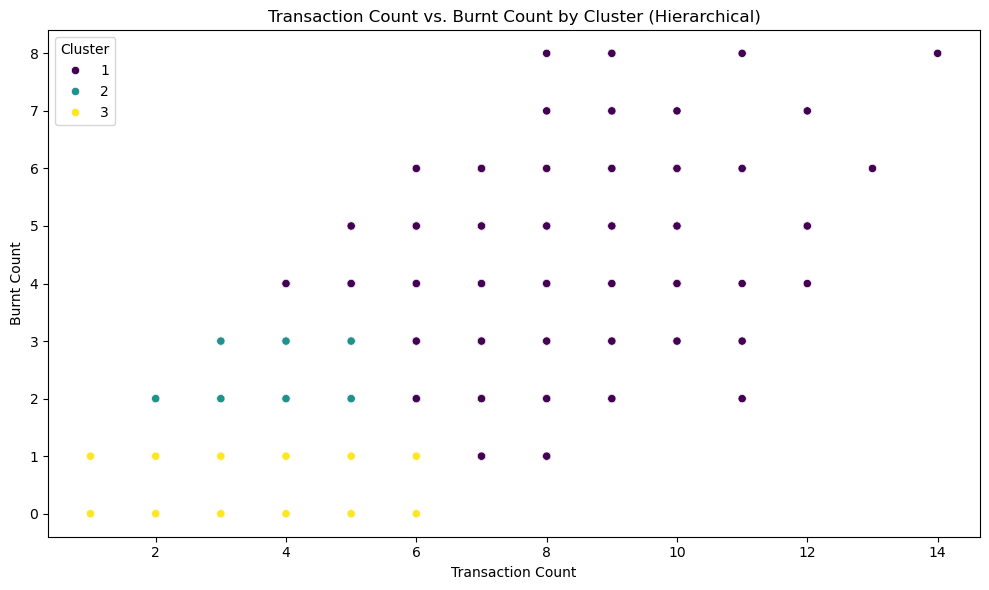

In [52]:

num_clusters = 3  # You can adjust the number of clusters
customer_features['Cluster'] = fcluster(linked, num_clusters, criterion='maxclust')


plt.figure(figsize=(10, 6))
sns.scatterplot(x='transaction_count', y='burnt_count', hue='Cluster', palette='viridis', data=customer_features, legend='full')
plt.title('Transaction Count vs. Burnt Count by Cluster (Hierarchical)')
plt.xlabel('Transaction Count')
plt.ylabel('Burnt Count')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


In [64]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score



# Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features[['transaction_count', 'burnt_count']])

# Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=5)  # Adjust n_clusters as needed
hierarchical_clusters = hierarchical.fit_predict(scaled_features)


customer_features['hierarchical_cluster'] = hierarchical_clusters


if len(set(hierarchical_clusters)) > 1:  # Ensure there is more than one cluster
    silhouette_avg_hierarchical = silhouette_score(scaled_features, hierarchical_clusters)
    print(f'Silhouette Score for Hierarchical Clustering: {silhouette_avg_hierarchical}')
else:
    print('Silhouette score is not defined for a single cluster')


Silhouette Score for Hierarchical Clustering: 0.38365311701997185


This score indicates that the clusters are reasonably well-defined. Hierarchical clustering seems to have performed the best among the methods I’ve tried.


### Cluster Analysis and Recommendations

1. **Cluster 1 (Yellow)**:
    - **Characteristics**: Customers with moderate transaction counts and moderate burnt counts.
    - **Recommendation**: These customers are moderately engaged. Offering loyalty rewards and personalized discounts could help increase their transaction frequency and burnt count.

2. **Cluster 2 (Purple)**:
    - **Characteristics**: Customers with high transaction counts and high burnt counts.
    - **Recommendation**: These are your most engaged customers. Focus on maintaining their loyalty with exclusive offers, early access to sales, and personalized rewards. Consider implementing a VIP program to further enhance their experience.

3. **Cluster 3 (Blue)**:
    - **Characteristics**: Customers with low transaction counts and low burnt counts.
    - **Recommendation**: These customers are less engaged. Providing welcome discounts, introductory offers, and targeted marketing campaigns could help increase their engagement. Consider sending personalized emails or notifications to encourage more frequent transactions.
